In [4]:
import pandas as pd

df = pd.read_csv('/content/traffic.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,1,5545
1,NaN,289.36,0.0,0.0,75,Clouds,0,4516
2,NaN,289.58,0.0,0.0,90,Clouds,0,4767
3,NaN,290.13,0.0,0.0,90,Clouds,0,5026
4,NaN,291.14,0.0,0.0,75,Clouds,0,4918


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   Rush Hour       48204 non-null  int64  
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.9+ MB


In [6]:
df = df.drop(columns = ['holiday'])

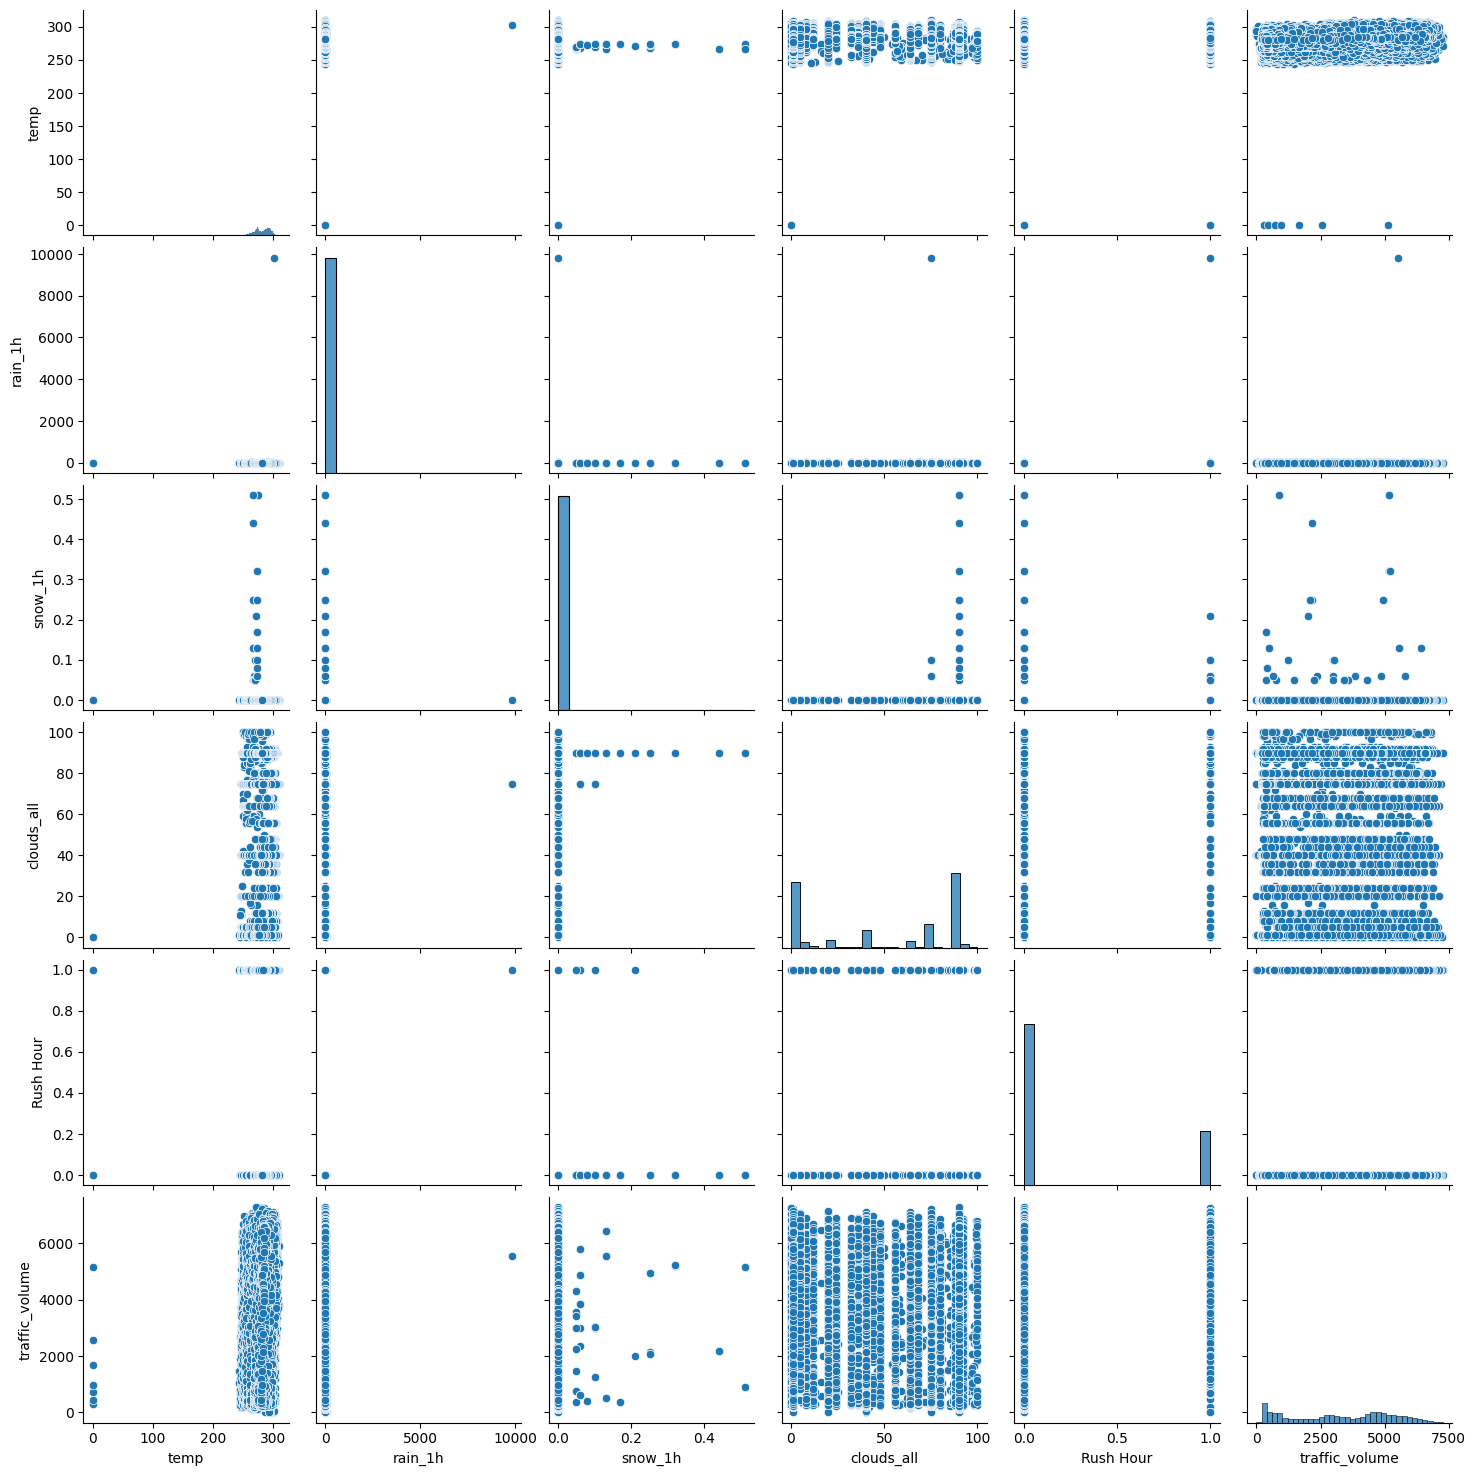

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [9]:
df.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'Rush Hour',
       'traffic_volume'],
      dtype='object')

In [10]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,Rush Hour,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,0.250124,3259.818355
std,13.338232,44.789133,0.008168,39.015750,0.433089,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,0.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,0.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,1.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,1.000000,7280.000000


<Axes: xlabel='weather_main'>

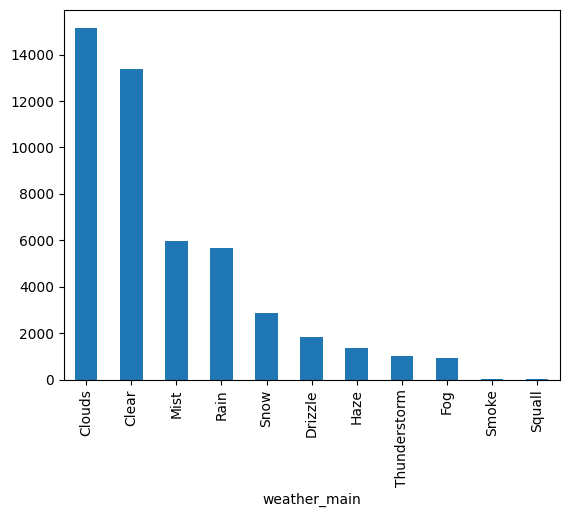

In [12]:
(df.weather_main.value_counts()).plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


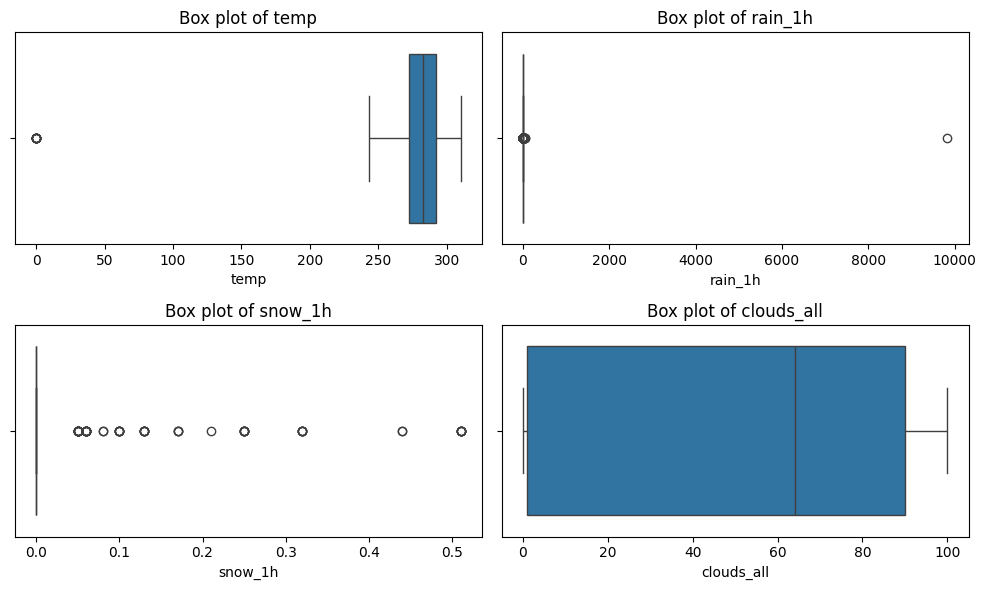

In [16]:
numerical_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
plt.figure(figsize=(10, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, data=df, orient='v')  # Vertical orientation
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

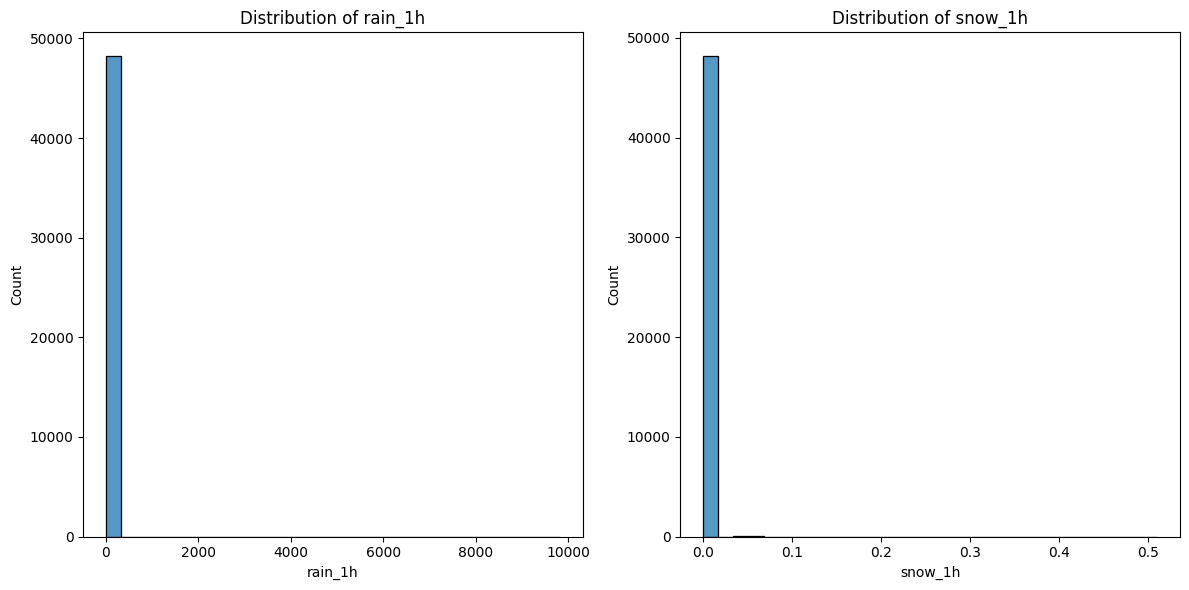

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['rain_1h'], bins=30, kde=False)
plt.title('Distribution of rain_1h')

plt.subplot(1, 2, 2)
sns.histplot(df['snow_1h'], bins=30, kde=False)
plt.title('Distribution of snow_1h')

plt.tight_layout()
plt.show()


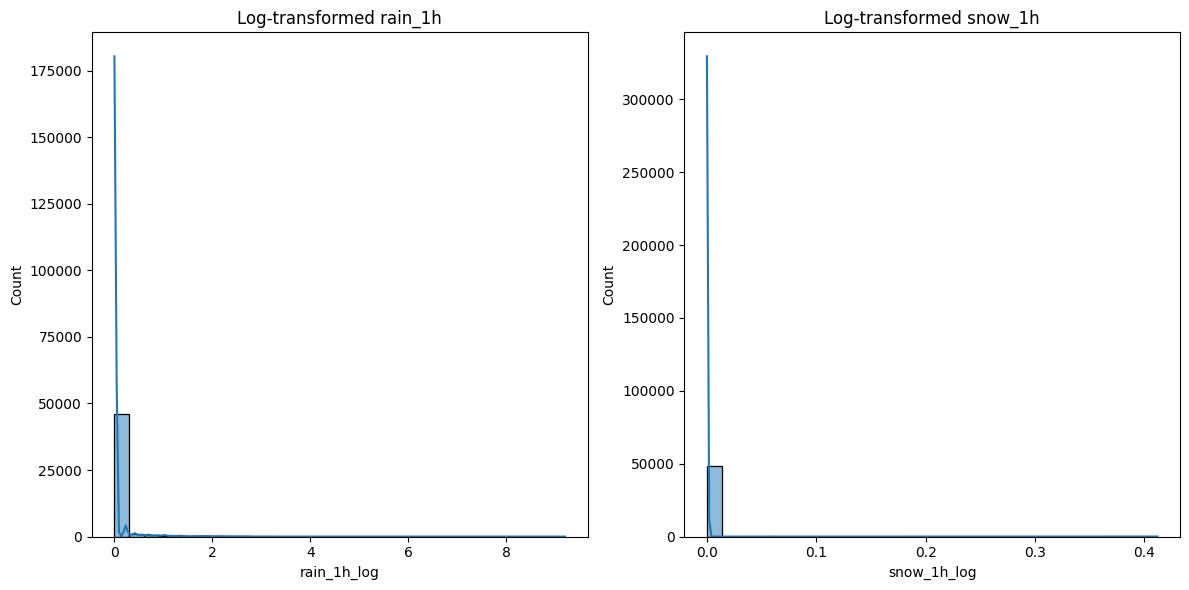

In [29]:
df['rain_1h_log'] = np.log1p(df['rain_1h'])
df['snow_1h_log'] = np.log1p(df['snow_1h'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['rain_1h_log'], bins=30, kde=True)
plt.title('Log-transformed rain_1h')

plt.subplot(1, 2, 2)
sns.histplot(df['snow_1h_log'], bins=30, kde=True)
plt.title('Log-transformed snow_1h')

plt.tight_layout()
plt.show()


In [30]:
df['rain_present'] = df['rain_1h'].apply(lambda x: 1 if x > 0 else 0)
df['snow_present'] = df['snow_1h'].apply(lambda x: 1 if x > 0 else 0)

In [86]:
df = df.drop(columns = ['rain_1h','snow_1h'])

In [88]:
df['rain_1h_log'].unique()

array([0.        , 0.22314355, 0.45107562, 0.3220835 , 0.26236426,
       0.25464222, 0.36464311, 0.3074847 , 1.15057203, 1.47932923,
       0.60976557, 0.56531381, 0.41210965, 0.52472853, 0.69314718,
       0.82855182, 0.85015093, 1.04380405, 0.99325177, 0.3852624 ,
       0.87962675, 0.89199804, 0.53062825, 1.43031125, 0.47623418,
       0.49469624, 0.70309751, 1.85941812, 2.26592111, 1.90805992,
       1.78842057, 1.53686722, 0.51879379, 0.37843644, 0.35065687,
       0.9242589 , 0.63657683, 0.87546874, 2.57945897, 1.19088756,
       2.14476101, 2.07191328, 2.85532012, 1.02245093, 1.26412673,
       2.316488  , 1.39871688, 0.97455964, 3.81661282, 1.57069708,
       1.92278773, 1.51732262, 2.12465388, 0.85441533, 2.83321334,
       2.44581926, 0.81977983, 1.8050047 , 3.03974916, 3.27032911,
       3.10995342, 1.88555335, 2.09309787, 1.94161522, 2.35422833,
       1.10856262, 4.03653888, 2.65394594, 2.02814825, 0.44468582,
       0.27763174, 1.21491274, 1.60542989, 1.6714733 , 1.08518

In [87]:
df.head()

,temp,clouds_all,weather_main,Rush Hour,traffic_volume,rain_1h_log,snow_1h_log,rain_present,snow_present
0,288.28,40,Clouds,1,5545,0.0,0.0,0,0
1,289.36,75,Clouds,0,4516,0.0,0.0,0,0
2,289.58,90,Clouds,0,4767,0.0,0.0,0,0
3,290.13,90,Clouds,0,5026,0.0,0.0,0,0
4,291.14,75,Clouds,0,4918,0.0,0.0,0,0


In [89]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['traffic_volume'])
y = df['traffic_volume']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [92]:
trf1 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32), ['weather_main']),
    ('scaler', StandardScaler(), ['temp','clouds_all'])
], remainder='passthrough')

x_train_new = trf1.fit_transform(x_train)

x_test_new = trf1.transform(x_test)

In [93]:
le = LinearRegression()

le.fit(x_train_new,y_train_scaled)

LinearRegression()

In [94]:
y_pred_scaled = le.predict(x_test_new)